In [1]:
%matplotlib inline
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
time = ['7:30','9:30', '11:30', '13:30', '15:30', '17:30', '19:30', '21:30', '23:30']
raad = []
with open(r'E:/3-курс/GOS/raad.txt') as r:
    for stroka in r:
        raad.append(int(stroka.strip()))    

 # Дозиметр на плате Arduino Uno


## Что такое Дозиметр

 
Дозиметр — это устройство, которое применяется для измерения мощности дозы имеющегося ионизирующего излучения. Порой «дозиметром» называют радиометр.

Существует несколько типов дозиметров, а именно: состоящие из газоразрядного счётчика Гейгера-Мюллера, цилиндрического для регистрации гамма-излучения или торцевого счётчика с тонким входным окном – для регистрации бета и гамма-излучения или на Сцинтилляционной Камере.

## Принцип работы газоразрядного счётчика Гейгера

Принцип работы счетчиков Гейгера основан на эффекте ударной ионизации газовой среды под действием радиоактивных частиц или квантов электромагнитных колебаний в межэлектродном пространстве при высоком ускоряющем напряжении.


Устройство состоит из герметичного металлического или стеклянного баллона, наполненного инертным газом (неон, аргон) или газовой смесью. Внутри баллона имеются электроды – катод и анод. Для облегчения возникновения электрического разряда в газовом баллоне создается пониженное давление. Электроды подключаются к источнику высокого напряжения постоянного тока через нагрузочный резистор, на котором формируются электрические импульсы при регистрации радиоактивных частиц.

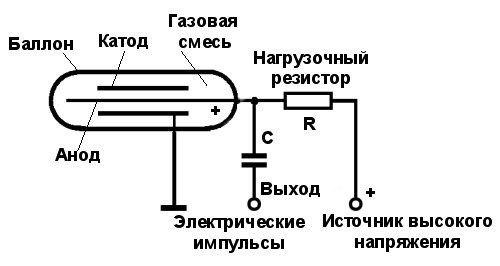

In [3]:
Image(filename = r'E:/3-курс/GOS/princip.jpg') 

В исходном состоянии газовый промежуток между электродами имеет высокое сопротивление и тока в цепи нет. Когда заряженная частица, имеющая высокую энергию, сталкивается с элементами конструкции датчика (корпус, баллон, катод), она выбивает некоторое количество электронов, которые оказываются в промежутке между электродами. Под действием ускоряющего напряжения в несколько сотен вольт электроны, находящиеся в инертном газе, начинают устремляться к аноду. На этом пути они легко ионизируют молекулы газа, выбивая вторичные электроны. Процесс многократно повторяется и количество электронов лавинообразно увеличивается, что приводит к возникновению разряда между катодом и анодом. В состоянии разряда газовый промежуток в межэлектродном пространстве становится токопроводящим, что обуславливает скачок тока в нагрузочном резисторе.

## Виды радиоактвного излучения

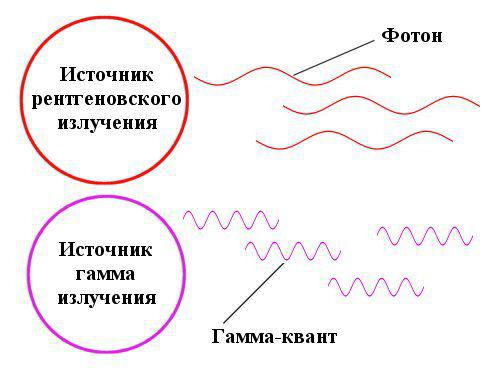

In [4]:
Image(filename = r'E:/3-курс/GOS/rad.jpg')

Газоразрядные счетчики предназначены только для регистрации частиц или квантов и не могут определить ни энергетические их характеристики, ни тип радиоактивного излучения, если это не предусмотрено специальной методикой измерения. Однако, сравнивая между собой различные счетчики Гейгера-Мюллера, важно понимать и правильно трактовать возможности этих устройств.

Радиационное излучение можно разделить на два вида: электромагнитное (в виде поля) и корпускулярное (в виде частиц). К первому виду относятся рентгеновские и гамма-лучи. Они обладают такими же свойствами, как и радиоволны, способны распространяться на большие расстояния и легко проникать сквозь многие материалы. По своей природе они имеют импульсный характер. Так как частота колебаний фотонов рентгеновского диапазона очень высокая, а частота гамма-квантов больше на 3-4 порядка, то принято говорить, что гамма-радиация более жесткая (по частоте), чем рентгеновские лучи, потому что оказывает на человека более разрушительное действие.


## Газовая трубка СТС-6
В работе используется газовая трубка (далее "трубка" или грубо "счетчик") СТС-6. Счетчик Гейгера-Мюллера, типа СТС-6, считает β и γ частицы и относится к самогасящимся счетчикам. Он представляет собой цилиндр из нержавеющей стали c ребрами прочности для прочности. Счетчик заполнен смесью паров неона и брома. Бром гасит разряд. По оси трубки натянута тонкая проволока, а коаксиально с ней расположен металлический цилиндр. И трубка и проволока являются электродами: трубка – катод, а проволока – анод. К катоду подключают минус от источника постоянного напряжения, а к аноду – через очень большое постоянное сопротивление – плюс от источника постоянного напряжения. При попадании в счетчик заряженной частицы некоторое количество газа ионизируется, и под воздействием напряжения между катодом и анодом ионы и электроны начинают двигаться — в трубке возникает кратковременный ток. Напряжение на аноде трубки кратковременно падает — получаем инвертированный импульс. 
### Характеристики СТС-6:
1) Напряжение начала счета. . . . . . . 285\335 В

2) Рекомендуемое рабочие напряжение. . . 360\440 В

3) Наибольшийй натуральный фон. . . . . . 110 имп. в мин.


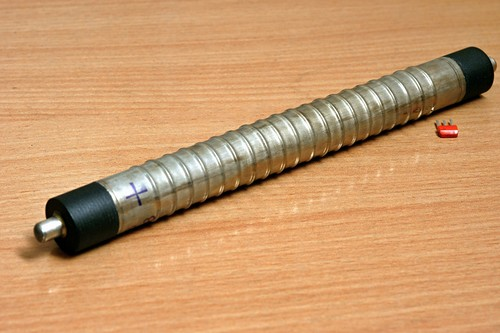

In [5]:
Image(filename = r'E:/3-курс/GOS/CTC-6.jpg') 

## Трансформатор
Схема построена на преобразователе напряжения с использованием трансформатора на броневом сердечнике типоразмера Б26 из феррита М2000НМ1. Cначала накручиалась II обмотка 420 витков диаметром 0.15 мм. Поверх нее моталась I обмотка 4 витка диаметром 0.3 мм. Межобмоточная изоляция состоит из нескольких слоев фторопластовой ленты.

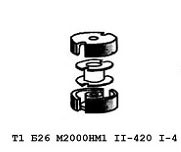

In [6]:
Image(filename = r'E:/3-курс/GOS/tansformator.jpg')

## Схема:


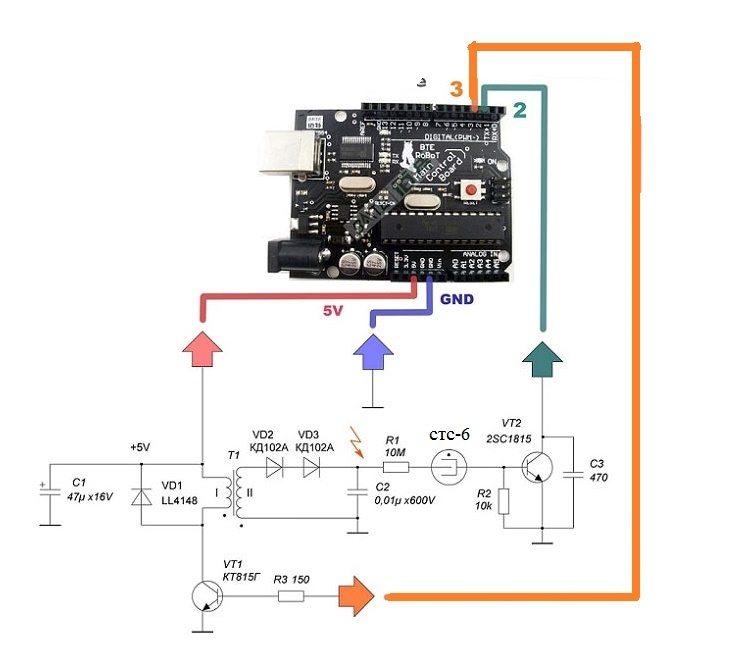

In [7]:
Image(filename = r"E:/3-курс/GOS/shema.jpg")

1) C1  - электролитический конденсатор               

2) C2  - конденсатор                                 

3) C3  - конденсатор                                 

4) R1  - резистор с сопротивлением 10МОм             

5) R2  - резистор с сопротивлением 10кОм             

6) R3  - резистор с сопротивлением 150Ом

7) VT1 - биполярный транзистор

8) VT2 - биполярный транзистор

9) VD1 - кремниевый диод

10) VD2 - кремниевый диод

11) VD3 - кремниевый диод

Счетчик управляется с микроконтроллера Arduino Uno. Переменное напряжение на первой обмотке создается за счет импульсного напряжения, приходящего с порта 3 на резистор R3. На порт 2 поступает сингнал с счётного каскада. И уже на самом контроллере происходит обработка полученных сигналов.

## Экспериментальная часть

### Таблица зарегистрированного фона

С помощью собранного мной дозиметра, я проанализировал фон за сутки.


In [8]:
table = pd.DataFrame({'Fon, mkR/h':raad, "time, h":time})
table

,"Fon, mkR/h","time, h"
0,20,7:30
1,17,9:30
2,18,11:30
3,19,13:30
4,19,15:30
5,21,17:30
6,17,19:30
7,18,21:30
8,20,23:30


### График

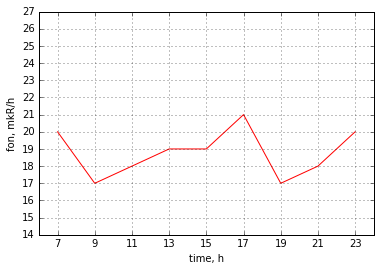

In [9]:
sred = sum(raad)/9
plt.plot([2*i+7 for i in range(9)], raad, 'r-')
plt.ylabel(r'fon, mkR/h')
plt.xlabel(r'time, h')
plt.yticks([14+i for i in range(14)])
plt.xticks([7, 9, 11, 13, 15, 17, 19, 21, 23])
plt.grid()
plt.show()


In [16]:
print('Среднее значение='+str(math.trunc(sred))+'mkR/h')

Среднее значение=18mkR/h


## Вывод

Как видно, собранный на микроконтроллере дозиметр удобен для измерения. Так как позволяет загружать нужные данные на HDD персонального компьютера, предварительно обработав их. Так же возможно одновременное подключение других датчиков, данные с которых так же будут обрабатываться, для полного сбора информации на "плату" из окружающей среды.

В этом приборе лучше использовать счетчики СБМ-20 или СИ29БГ. Так как при использовании в работе трубки СТС-6 возникали проблемы в тестировании.

Так же при резкое отключение дозиметра от компьютера ( при питании от него) легко можно испортить микроконтроллер.